In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\HP\Downloads\StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 1. Find out how many males and females participated in the test.

In [6]:
df.value_counts('gender')

gender
female    518
male      482
dtype: int64

518 females and 482 males participated in the test.

<function matplotlib.pyplot.show(close=None, block=None)>

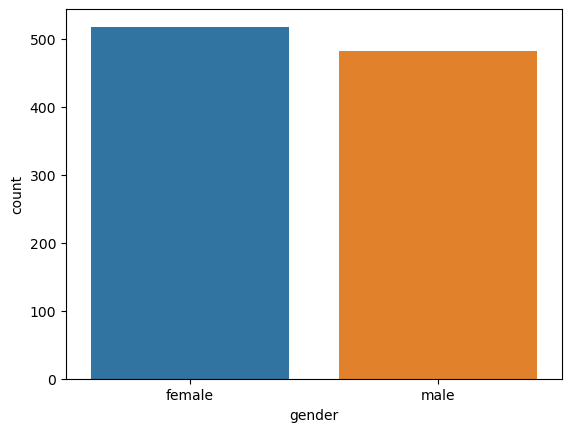

In [7]:
sns.countplot(x=df.gender)
plt.show

#### 2. What do you think about the students' parental level of education?

In [8]:
df['parental level of education'].unique()

array(['some high school', 'high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [9]:
df.value_counts('parental level of education')

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
dtype: int64

In [10]:
dfp= df.groupby(['parental level of education'])[['math score','reading score','writing score']].mean()

In [11]:
dfp

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.977477,71.018018,70.031532
bachelor's degree,69.288136,73.000000,73.381356
high school,61.821429,64.602041,62.403061
master's degree,70.254237,75.949153,75.677966
some college,67.128319,69.566372,69.035398
some high school,63.134078,66.759777,64.888268


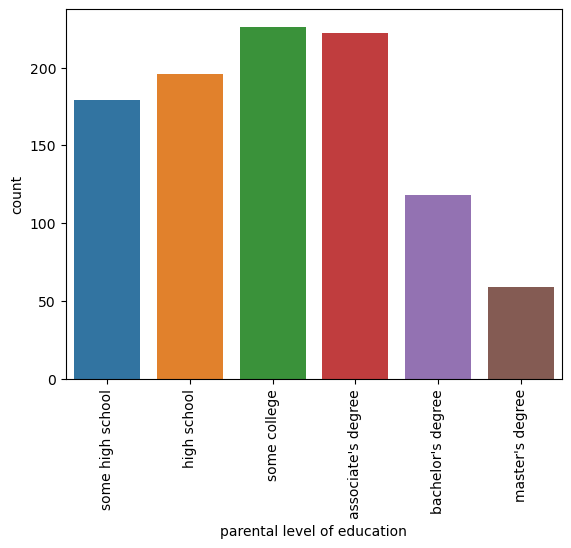

In [12]:
sns.countplot(x='parental level of education',data=df)
plt.xticks(rotation=90)
plt.show()

In [13]:
df['average score']=(df['math score']+ df['reading score'] + df['writing score'])/3

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000
3,female,group B,some college,standard,none,11,38,32,27.000000
4,female,group C,some college,free/reduced,none,22,39,33,31.333333


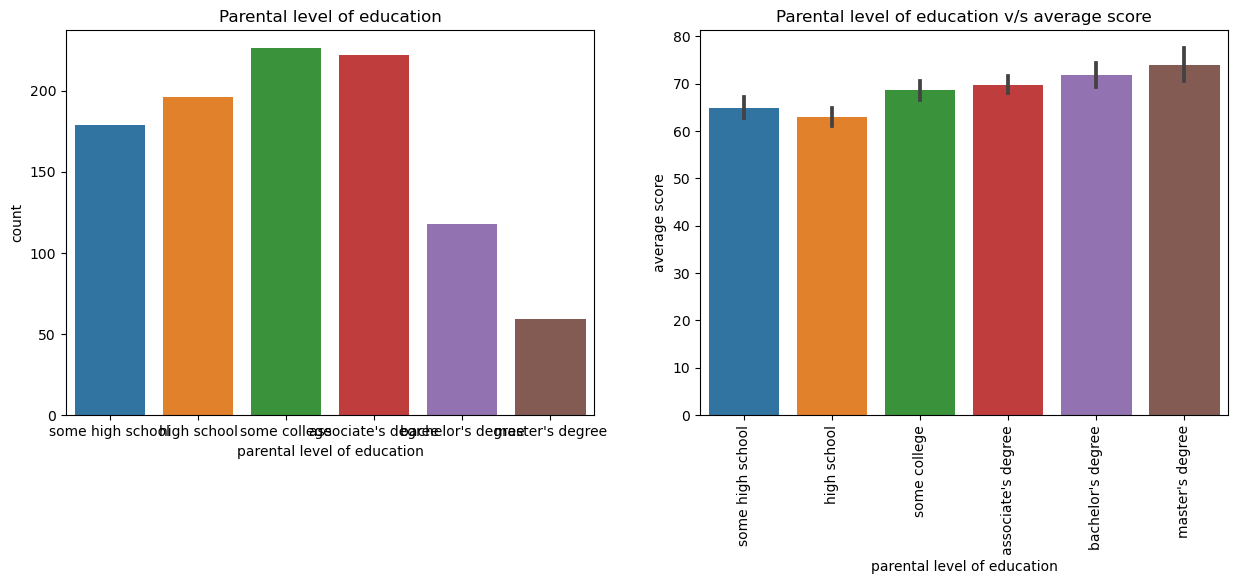

In [15]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize= (15,5))

sns.countplot(x='parental level of education',data=df,ax=ax1)
ax1.title.set_text('Parental level of education')
plt.xticks(rotation = 90)
sns.barplot(x = 'parental level of education', 
            y = 'average score', data = df,ax=ax2)
ax2.title.set_text('Parental level of education v/s average score')
plt.xticks(rotation = 90)
plt.show()

There are lesser number of students whose parents have a master's degree, but those students have high average score.
Also, students whose parents have a bachelor's degree score more on average. Most of the student's parents have some college or associate degree.

#### 3. Who scores the most on average for math, reading and writing based on

● Gender
● Test preparation course

In [16]:
df1= df.groupby(['gender'])[['math score','reading score','writing score']].mean()

In [17]:
df1

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In math, males scored more than females. In reading and writing females have more scores.

In [18]:
df2= df.groupby(['test preparation course'])[['math score','reading score','writing score']].mean()

In [19]:
df2

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


From the dataframe it is clear that the students who completed the Test preparation course have a high scores in all the three subjects.

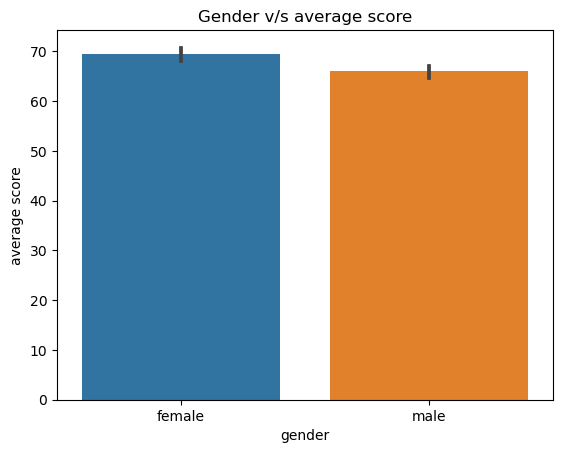

In [20]:
plt.title('Gender v/s average score')
sns.barplot(x='gender',y='average score',data=df)
plt.show()

Females score most on average than males.

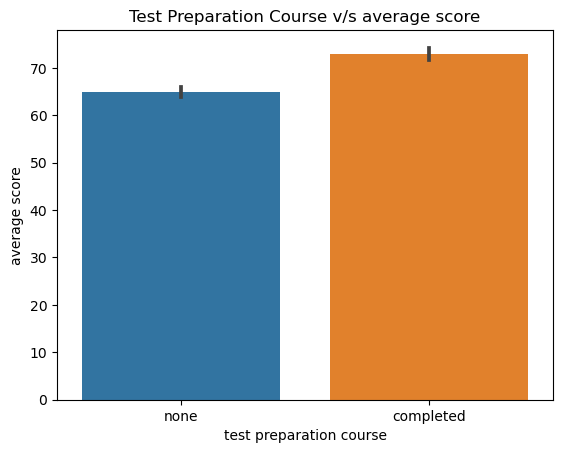

In [21]:
plt.title('Test Preparation Course v/s average score')
sns.barplot(x='test preparation course',y='average score',data=df)
plt.show()

Students who completed Test preparation course scored most on average for math,reading and writing.

#### 4. What do you think about the scoring variation for math, reading and writing
based on

● Gender
● Test preparation course

In [22]:
df3=df.groupby(['gender'])[['math score','reading score','writing score']].var()

In [23]:
df3

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


The scoring variation is less for males in all three subjects.

In [24]:
df4=df.groupby(['test preparation course'])[['math score','reading score','writing score']].var()

In [25]:
df4

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


The students attended test preparation course have less scoring variation.

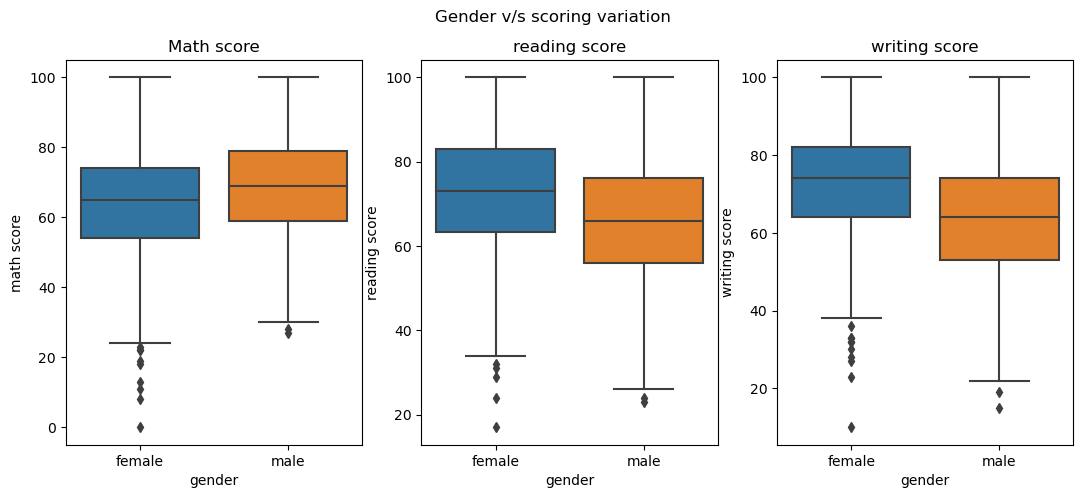

In [26]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3 ,figsize=(13,5))
fig.suptitle('Gender v/s scoring variation')

sns.boxplot(x='gender',y='math score',data=df,ax=ax1)
ax1.title.set_text('Math score')

sns.boxplot(x='gender',y='reading score',data=df,ax=ax2)
ax2.title.set_text('reading score')

sns.boxplot(x='gender',y='writing score',data=df,ax=ax3)
ax3.title.set_text('writing score')
plt.show()

Male students scored more than female students in Math,but in reading and writing female students scored more. There is a female student who has zero marks in math,also there are female students who scored least marks than males. So scoring variation is more for females.

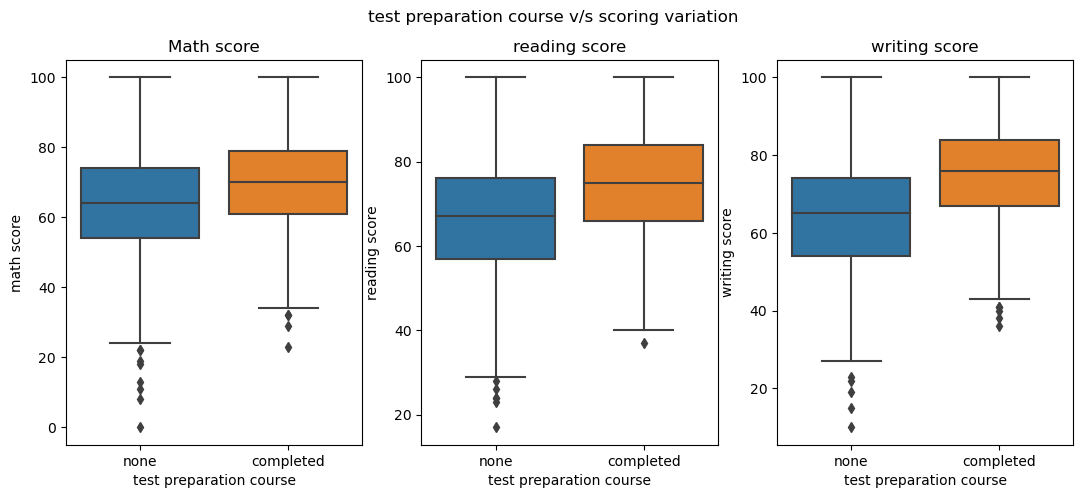

In [27]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(13,5))
fig.suptitle('test preparation course v/s scoring variation')

sns.boxplot(x='test preparation course',y='math score',data=df,ax=ax1)
ax1.title.set_text('Math score')

sns.boxplot(x='test preparation course',y='reading score',data=df,ax=ax2)
ax2.title.set_text('reading score')

sns.boxplot(x='test preparation course',y='writing score',data=df,ax=ax3)
ax3.title.set_text('writing score')
plt.show()

Students who completed test preparation course have scored better than who did not complete.The students who did not complete the course are the ones who scores zero and the lowest marks.Hence those who did not complete test preparation course is more variated.

#### 5. The management needs your help to give bonus points to the top 25% of
students based on their math score, so how will you help the management
to achieve this.


In [28]:
df.describe()

,math score,reading score,writing score,average score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000,67.771667
std,15.569567,14.706436,15.226381,14.409003
min,0.000000,17.000000,10.000000,9.000000
25%,57.000000,59.000000,58.000000,58.333333
50%,66.000000,70.000000,69.000000,68.666667
75%,77.000000,79.250000,79.000000,77.750000
max,100.000000,100.000000,100.000000,100.000000


In [29]:
df["math score"].quantile(0.75)

77.0

In [30]:
top25 = df[df["math score"] >= 77].sort_values("math score",ascending=False)
top25

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
999,male,group E,bachelor's degree,standard,completed,100,100,100,100.000000
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667
997,male,group D,some college,standard,completed,100,97,99,98.666667
996,male,group A,some college,standard,completed,100,96,86,94.000000
517,female,group E,associate's degree,standard,none,100,100,100,100.000000
...,...,...,...,...,...,...,...,...,...
854,male,group D,some high school,standard,completed,77,68,69,71.333333
855,male,group E,associate's degree,free/reduced,completed,77,69,68,71.333333
856,male,group E,some high school,standard,completed,77,76,77,76.666667
415,female,group B,master's degree,free/reduced,completed,77,97,94,89.333333


In [31]:
top25.shape

(255, 9)

In [32]:
top25.value_counts('gender')

gender
male      151
female    104
dtype: int64

In [33]:
top25.value_counts('race/ethnicity')

race/ethnicity
group D    72
group C    65
group E    63
group B    40
group A    15
dtype: int64

The top 25% students in math are those 255 students who got more than 77 marks. The dataframe top25 shows it. There are 151 males and 104 females from all 5 race/ethnicity. 